In [1]:
import sys

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load datasets

In [2]:
round_ini = 0
round_eq = 2

In [3]:
authority_dataset = pd.read_csv("data_mail_finished/authority_treatment/df_experiment_global_with authority.csv")
norm_dataset = pd.read_csv("data_mail_finished/authority_treatment/df_player_global_with authority.csv")

In [4]:
non_authority_dataset = pd.read_csv("data_mail_finished/baseline_treatment/df_experiment_global_without authority.csv")
non_norm_dataset = pd.read_csv("data_mail_finished/baseline_treatment/df_player_global_without authority.csv")

In [5]:
final_rounds = non_authority_dataset[(non_authority_dataset["round_number"] <= round_eq) & (non_authority_dataset["round_number"] >= round_ini)]
final_rounds["partial_contribution"] = final_rounds["total_contribution"] - final_rounds["contribution"]

/tmp/ipykernel_141139/1739112671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_rounds["partial_contribution"] = final_rounds["total_contribution"] - final_rounds["contribution"]


In [6]:
mean_contribution = final_rounds.groupby("code").agg("mean",numeric_only=True)["contribution"]
mean_payoff = final_rounds.groupby("code").agg("mean",numeric_only=True)["unconditional_payoff"]

In [7]:
stat_df = pd.DataFrame({"mean_contribution":mean_contribution,
                       "mean_payoff":mean_payoff})

In [8]:
all_tuples = []

for ronda in range(round_ini,round_eq+1):
    data_round = final_rounds[final_rounds["round_number"] == ronda]
    all_tuples.extend(data_round[["partial_contribution","contribution"]].values)
    
all_tuples = np.array(all_tuples)

heat_matrix = np.zeros((31*5,31))

for tup in all_tuples:
    heat_matrix[tup[0],tup[1]] +=1

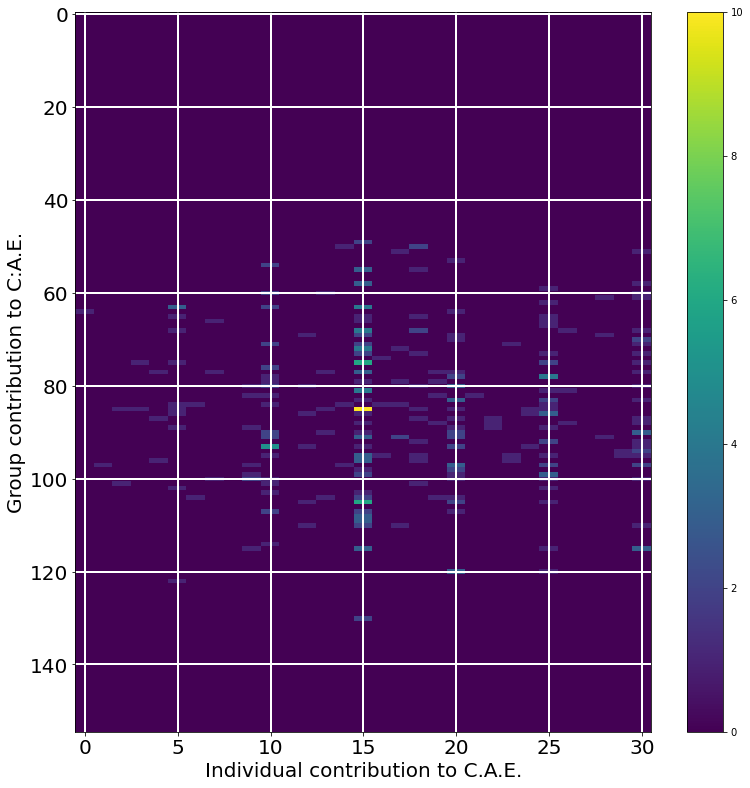

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
ax.set(xlabel = "Individual contribution to C.A.E.",ylabel="Group contribution to C:A.E.")
       #xlim=(0, 31),
       #ylim=((156,0)))
ax.xaxis.get_label().set_fontsize(20)
ax.yaxis.get_label().set_fontsize(20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
plt.imshow(heat_matrix,aspect="auto")
plt.colorbar()
ax.grid(color='w', linestyle='-', linewidth=2)

In [10]:
all_tuples_2 = []

for code in set(final_rounds["code"]):
    data_participant = final_rounds[final_rounds["code"] == code]
    for i in range(round_ini,round_eq+1):
        curr_value = data_participant[data_participant["round_number"] == i]["contribution"].values
        next_value = data_participant[data_participant["round_number"] == i+1]["contribution"].values
        if len(curr_value) and len(next_value):
            all_tuples_2.append([curr_value[0],next_value[0]])
            
heat_matrix_2 = np.zeros((31,31))

for tup in all_tuples_2:
    heat_matrix_2[tup[0],tup[1]] +=1

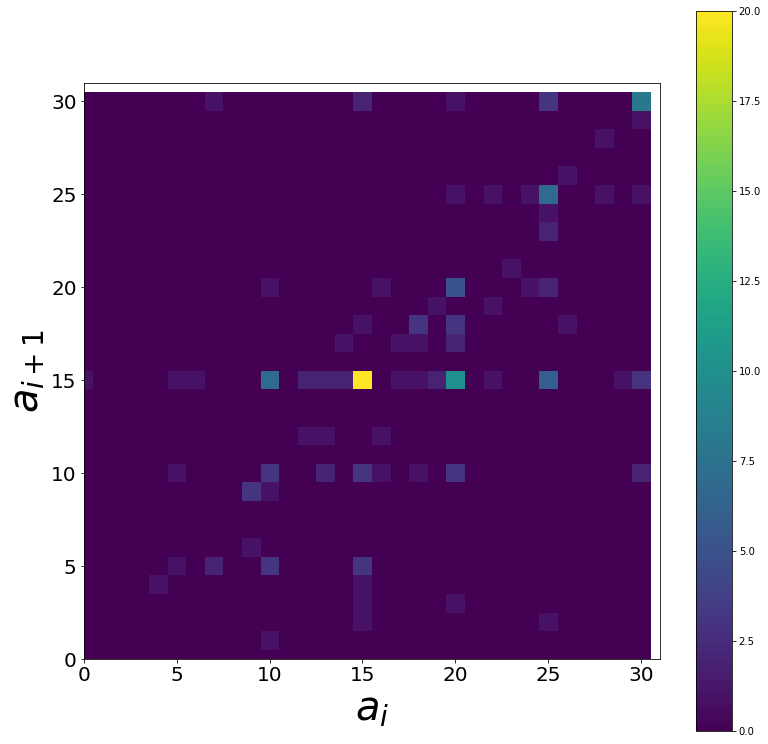

In [11]:
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_axes([0,0,1,1])
    ax.set(xlabel = "$a_{i}$",ylabel="$a_{i+1}$",
           xlim=(0, 31),
           ylim=(0, 31))
    ax.xaxis.get_label().set_fontsize(40)
    ax.yaxis.get_label().set_fontsize(40)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    plt.imshow(heat_matrix_2)
    plt.colorbar()